### Analysis of MovieLens Data

We are provided with the MovieLens data collected by the GroupLens Research Project at the University of Minnesota.
In particular, the data was collected through the MovieLens web site (movielens.umn.edu), which records a number of users' ratings (1-5) towards their watched movies. Besides, simple demographic info (e.g., age and gender) for the users and descriptive info (e.g., title and genre) for the movies are provided. 

Originally, there are several separate files to record the user-movie rating info, user demographic info and movie descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'movielens_data.csv'. The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | rating | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __rating__ - the user's rating towards the movie
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may rate multiple movies and a same movie (i.e., a same movieId) may receive ratings from multiple users.

There are four questions to explore with the data as shown below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

movies = 'movielens_data.csv'

In [2]:
movies = pd.read_csv('movielens_data.csv')
movies.head(20)

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,186,39.0,F,executive,302,NaN,Crime,891717742
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
4,166,47.0,NaN,educator,346,1.0,Drama,886397596
5,298,44.0,M,executive,474,4.0,War,884182806
6,115,NaN,M,engineer,265,2.0,Action,881171488
7,253,26.0,F,librarian,465,5.0,Adventure,891628467
8,305,23.0,M,programmer,451,3.0,Romance,886324817
9,6,42.0,M,executive,86,3.0,Drama,883603013


#### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * age/gender/rating is missing
 * occupation is 'none'

__Print the length of the data__ before and after removing the missing data.  

### Length of Data With Non-Values

In [3]:
# code and solutions
movies.shape

(100000, 8)

### Length of Data After Removing Non-Values

In [4]:
movies_reviews = movies.dropna()
movies_reviews.shape

(99952, 8)

In [5]:
new_stats = movies_reviews[movies_reviews['occupation'] != 'none']
new_stats.shape

(99022, 8)

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique occupations, unique movies, and unique genres
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie 


### Unique Values

In [6]:
# code and solutions
print(new_stats.userId.unique())
print(new_stats.occupation.unique())
print(new_stats.movieId.unique())
print(new_stats.genre.unique())

[196  22 244 298 253 305   6  62 286 200 210 303 122 194 291 119 167 299
 308  95  38 102  63  50 301 225 290  97 157 181 278 276   7  10 284 201
 287 246 242 249 178 251  81 260  25  59  72  87 292 115  20  13 138  60
 223 189 243  92 241 254 293 222 267  42  11   8 162 279 145  28 135  32
  90 216 166 250 271 160 265 198 168 110  58 237  94 128  44 264  41 224
  82 262 174  43  84 269  99 259  85 213 121  49 155  68 172  19 268   5
  80  66  18  26   1  56  15 207 232  52 161 148 125  83 272 151  54  16
  91 294 229  36  70  14 295 233 214 192 100 307 234 297 193 113 275 219
 218 123 158 302  23 296  33 154  77 270 187 170 101 184 112 133 215  69
 104 240 144 191  61 177 203  21 197 134 180 236 263  64 114 239 117  65
 137 257 111 285  96 116  73 221 235 164 281 182 129  45 131 230 126 231
 280 288 152  79  75 245 282  78 118 283 171 107 226 185 150 274 188  48
 311 208   2 205 248  93 159 217 146  29 156  37 141 186 195 306 108  47
 173 255 109  89 140 190  24  17 313  53 124 149 17

### Description Statistic for Rating Records

In [7]:
new_stats.rating.describe()

count    99022.000000
mean         3.527792
std          1.125743
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

### Description Statistic for Movies Rated by Users

In [8]:
print(new_stats.groupby(['movieId'])['userId'].mean())
print(new_stats.groupby(['movieId'])['userId'].std())
print(new_stats.groupby(['movieId'])['userId'].min())
print(new_stats.groupby(['movieId'])['userId'].max())

movieId
1       479.552809
2       496.643411
3       459.500000
4       473.980583
5       445.238095
           ...    
1678    863.000000
1679    863.000000
1680    863.000000
1681    896.000000
1682    916.000000
Name: userId, Length: 1682, dtype: float64
movieId
1       273.070223
2       266.374994
3       255.859786
4       257.193255
5       258.064325
           ...    
1678           NaN
1679           NaN
1680           NaN
1681           NaN
1682           NaN
Name: userId, Length: 1682, dtype: float64
movieId
1         1
2         1
3         1
4         1
5         1
       ... 
1678    863
1679    863
1680    863
1681    896
1682    916
Name: userId, Length: 1682, dtype: int64
movieId
1       941
2       943
3       936
4       940
5       925
       ... 
1678    863
1679    863
1680    863
1681    896
1682    916
Name: userId, Length: 1682, dtype: int64


### Description Statistic For Rating Receive In Each Movies

In [9]:
print(new_stats.groupby(['rating'])['movieId'].mean())
print(new_stats.groupby(['rating'])['movieId'].std())
print(new_stats.groupby(['rating'])['movieId'].min())
print(new_stats.groupby(['rating'])['movieId'].max())

rating
1.0    576.955497
2.0    503.161911
3.0    457.088666
4.0    394.473213
5.0    347.972467
Name: movieId, dtype: float64
rating
1.0    398.197894
2.0    362.263011
3.0    338.935699
4.0    307.331286
5.0    285.062912
Name: movieId, dtype: float64
rating
1.0    1
2.0    1
3.0    1
4.0    1
5.0    1
Name: movieId, dtype: int64
rating
1.0    1678
2.0    1680
3.0    1682
4.0    1674
5.0    1656
Name: movieId, dtype: int64


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/occupation/genre and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

### Differences Between Gender Ratings

<AxesSubplot:>

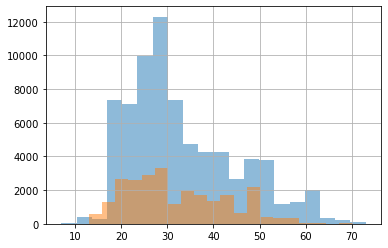

In [10]:
# your code and solutions
males = new_stats[new_stats['gender'] == 'M']
females = new_stats[new_stats['gender'] == 'F']
males['age'].hist(histtype='stepfilled', bins = 20, alpha=.5)
females['age'].hist(histtype='stepfilled', bins = 20, alpha=.5)

### Each Genre Ratings

Text(0.5, 1.0, 'Genre Ratings')

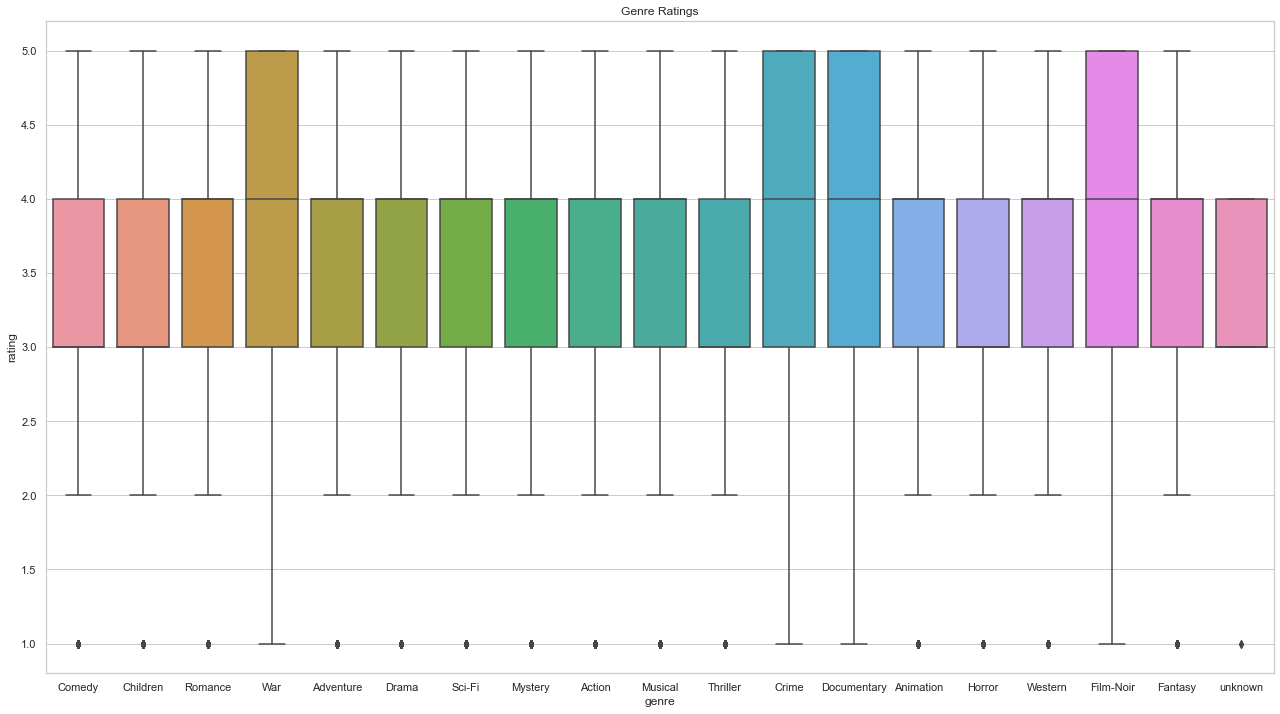

In [11]:
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(22,12))
sns.boxplot(x='genre', y='rating', data=new_stats, orient="v")
plt.title('Genre Ratings')

### Observations

Both males and females are evenly distributed between ratings. However when reviewing the Genre Rating graph all genres have similar ratings and outliers with the exception of 4 genres as both genders watch more of the documentary of wars and crime related themes.

#### Q4. Detect and remove outliers

We may define outlier users and movies with three rules:

* users whose age is no more than 10
* users who rate less than 20 movies
* movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
 
Please remove the corresponding records in the csv file that involves outlier users and movies. After that, __print the length of the data__.

In [13]:
# code and solutions
new_stats_clean = new_stats.drop( new_stats.index[(new_stats.age < 10) & 
                                      ((new_stats['userId'] < 20) | 
                                       (new_stats['movieId'] < 10))]
                        )


new_stats_clean.shape

(99020, 8)